## Problem Statement
The company wants to understand and process the data coming out of data engineering pipelines:
We need to clean, sanitize and remove outliers from the data to get useful features from raw information. To Make sense of the raw data and help the data science team build forecasting models, we also need to normalize or standardize the data before submitting it. We need to extract the data's month, day, year, and state to get more information from the table for further analysis.


### First EDA on raw data file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

Raw data imported to the notebook as df

In [156]:
df = pd.read_csv("d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_001_551_original_delhivery_data.csv")

In [4]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


From the above output we can see that the table contain columns as followes 'data', 'trip_creation_time', 'route_schedule_uuid', 'route_type','trip_uuid', 'source_center', 'source_name', 'destination_center','destination_name', 'od_start_time', 'od_end_time','start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time','osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'.

In [5]:
info = df.info(verbose=True)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

The above output shows that the columns are off the type bool, float, int, and object. However, some columns represent dates but are classified as objects,  which are further corrected in the DateTime format.

In [6]:
df[["trip_creation_time","od_start_time"\
    ,"od_end_time","cutoff_timestamp"]] = df[["trip_creation_time","od_start_time",\
                                                "od_end_time","cutoff_timestamp"]].apply(pd.to_datetime)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [8]:
df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_month'] = df['trip_creation_time'].dt.month_name()
df['trip_creation_day'] = df['trip_creation_time'].dt.day

From the trip creation column the year, month, and day are extracted. 

In [9]:
new = df["destination_name"].str.split("(",n=1,expand=True)
state = new[1].str.strip("()")
new_2 = df["source_name"].str.split("(",n=1,expand=True)
state_2 = new_2[1].str.strip("()")

In [10]:
df["Destination_state"] = state
df["source_state"] = state_2

From the source_name column, the source state is extracted, and from the destination_name columns, the destination name is extracted.

In [11]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_year,trip_creation_month,trip_creation_day,Destination_state,source_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,2018,September,20,Gujarat,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,2018,September,20,Gujarat,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,2018,September,20,Gujarat,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,2018,September,20,Gujarat,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,2018,September,20,Gujarat,Gujarat


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [13]:
df["source_state"].unique()
# These are the states from which the products are shipped initially.

array(['Gujarat', 'Maharashtra', 'Karnataka', 'Punjab', 'Haryana',
       'Uttarakhand', 'Tamil Nadu', 'Rajasthan', nan, 'Telangana',
       'Madhya Pradesh', 'Uttar Pradesh', 'Himachal Pradesh', 'Kerala',
       'Andhra Pradesh', 'Bihar', 'Jharkhand', 'Assam', 'West Bengal',
       'Orissa', 'Delhi', 'Jammu & Kashmir', 'Chandigarh', 'Chhattisgarh',
       'Goa', 'Pondicherry', 'Dadra and Nagar Haveli',
       'Arunachal Pradesh', 'Nagaland', 'Meghalaya', 'Tripura', 'Mizoram'],
      dtype=object)

In [14]:
# These are the destination states.
df["Destination_state"].unique()

array(['Gujarat', 'Maharashtra', 'Karnataka', 'Kerala', 'Punjab',
       'Uttarakhand', 'Tamil Nadu', 'Haryana', 'Rajasthan', nan,
       'Telangana', 'Uttar Pradesh', 'Delhi', 'Himachal Pradesh',
       'Andhra Pradesh', 'Bihar', 'Jharkhand', 'Assam', 'Orissa',
       'West Bengal', 'Jammu & Kashmir', 'Madhya Pradesh', 'Chandigarh',
       'Chhattisgarh', 'Goa', 'Pondicherry', 'Arunachal Pradesh',
       'Dadra and Nagar Haveli', 'Meghalaya', 'Tripura', 'Mizoram',
       'Daman & Diu', 'Nagaland'], dtype=object)

In [15]:
# Trip creation month and day
years = df["trip_creation_year"].unique()
months = df["trip_creation_month"].unique()
print(f"The given trips are created in the following years {years}")
print(f"The given trips are created in the following months {months}")

The given trips are created in the following years [2018]
The given trips are created in the following months ['September' 'October']


In [16]:
# A column named calculated_start_scan_to_end_scan is created using the columns od_start_time and od_end_time
df["calculated_start_scan_to_end_scan"] = (df['od_end_time'] - df["od_start_time"])/pd.Timedelta(minutes=1)

In [17]:
df = df.loc[:,["data","route_type","trip_creation_time","trip_creation_year","trip_creation_month",\
          "trip_creation_day","trip_uuid","source_center","source_name","source_state",\
        "destination_center","destination_name","Destination_state",\
         "od_start_time","od_end_time","start_scan_to_end_scan","calculated_start_scan_to_end_scan",\
         "is_cutoff","cutoff_factor","cutoff_timestamp","actual_distance_to_destination","actual_time",\
         "osrm_time","osrm_distance","factor","segment_actual_time","segment_osrm_time",\
         "segment_osrm_distance","segment_factor"]]

In [18]:
df.head()

,data,route_type,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,trip_uuid,source_center,source_name,source_state,destination_center,destination_name,Destination_state,od_start_time,od_end_time,start_scan_to_end_scan,calculated_start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,Carting,2018-09-20 02:35:36.476840,2018,September,20,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Gujarat,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Gujarat,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,86.213637,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,Carting,2018-09-20 02:35:36.476840,2018,September,20,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Gujarat,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Gujarat,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,86.213637,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,Carting,2018-09-20 02:35:36.476840,2018,September,20,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Gujarat,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Gujarat,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,86.213637,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,Carting,2018-09-20 02:35:36.476840,2018,September,20,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Gujarat,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Gujarat,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,86.213637,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,Carting,2018-09-20 02:35:36.476840,2018,September,20,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Gujarat,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Gujarat,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,86.213637,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Removing null values

In [19]:
(df.isna().sum()/len(df))*100

data                                 0.000000
route_type                           0.000000
trip_creation_time                   0.000000
trip_creation_year                   0.000000
trip_creation_month                  0.000000
trip_creation_day                    0.000000
trip_uuid                            0.000000
source_center                        0.000000
source_name                          0.202254
source_state                         0.202254
destination_center                   0.000000
destination_name                     0.180165
Destination_state                    0.180165
od_start_time                        0.000000
od_end_time                          0.000000
start_scan_to_end_scan               0.000000
calculated_start_scan_to_end_scan    0.000000
is_cutoff                            0.000000
cutoff_factor                        0.000000
cutoff_timestamp                     0.000000
actual_distance_to_destination       0.000000
actual_time                       

Here we can we that the source center, destination center, source state, and destination state have null values, but all of them are less than 1%. We can drop these null values, but it may affect the aggregations done later, so we are filling in the null values. The null values are filled with Missing_source, missing destination, and missing state as follwes.

In [20]:
df["source_name"] = df["source_name"].fillna("Missing_source")
df["destination_name"] = df["destination_name"].fillna("Missing_destination")
df["Destination_state"] = df["Destination_state"].fillna("Missing state")
df["source_state"] = df["source_state"].fillna("Missing State")

In [21]:
(df.isna().sum()/len(df))*100

data                                 0.0
route_type                           0.0
trip_creation_time                   0.0
trip_creation_year                   0.0
trip_creation_month                  0.0
trip_creation_day                    0.0
trip_uuid                            0.0
source_center                        0.0
source_name                          0.0
source_state                         0.0
destination_center                   0.0
destination_name                     0.0
Destination_state                    0.0
od_start_time                        0.0
od_end_time                          0.0
start_scan_to_end_scan               0.0
calculated_start_scan_to_end_scan    0.0
is_cutoff                            0.0
cutoff_factor                        0.0
cutoff_timestamp                     0.0
actual_distance_to_destination       0.0
actual_time                          0.0
osrm_time                            0.0
osrm_distance                        0.0
factor          

# Merging columns

In [22]:
df

,data,route_type,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,trip_uuid,source_center,source_name,source_state,destination_center,destination_name,Destination_state,od_start_time,od_end_time,start_scan_to_end_scan,calculated_start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,Carting,2018-09-20 02:35:36.476840,2018,September,20,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Gujarat,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Gujarat,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,86.213637,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,Carting,2018-09-20 02:35:36.476840,2018,September,20,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Gujarat,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Gujarat,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,86.213637,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,Carting,2018-09-20 02:35:36.476840,2018,September,20,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Gujarat,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Gujarat,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,86.213637,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,Carting,2018-09-20 02:35:36.476840,2018,September,20,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Gujarat,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Gujarat,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,86.213637,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,Carting,2018-09-20 02:35:36.476840,2018,September,20,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Gujarat,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Gujarat,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,86.213637,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,Carting,2018-09-20 16:24:28.436231,2018,September,20,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),Haryana,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,427.686364,True,45,2018-09-20 21:57:20.000000,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,Carting,2018-09-20 16:24:28.436231,2018,September,20,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),Haryana,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,427.686364,True,54,2018-09-20 21:31:18.000000,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,Carting,2018-09-20 16:24:28.436231,2018,September,20,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),Haryana,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,427.686364,True,63,2018-09-20 21:11:18.000000,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,Carting,2018-09-20 16:24:28.436231,2018,September,20,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),Haryana,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,427.686364,True,72,2018-09-20 20:53:19.000000,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


Since the delivery details of one package are divided into several rows, we need to aggregate the fields to make it one transport. Hence we needed to group the data based on Trip_uuid, Source ID and Destination ID and use aggregation in each column to combine multiple rows to get the final desired output. Some data is the cumulative sum of each transport, and others are just the final output value. Max () or last() is used for columns with the cumulative sum, and for the columns with segmented values, simple sum() is used. For categorical with repeated output mode() is used.

In [23]:
table_1 = df.groupby(["trip_uuid"]).aggregate({"data":pd.Series.mode,"route_type":pd.Series.mode\
                                               ,"is_cutoff":"last"}).reset_index()

In [24]:
table_2 = df.groupby(["trip_uuid","source_center","destination_center"]).aggregate({"source_state":pd.Series.mode,\
                                                                        "Destination_state":pd.Series.mode,\
                                                                        "trip_creation_time":"max",\
                                                                        "od_start_time":"max",\
                                                                        "od_end_time":"max",\
                                                                        "trip_creation_month":"max",\
                                                                        "trip_creation_year":"max",\
                                                                        "trip_creation_day":"max",\
                                                                        "cutoff_timestamp":"max",\
                                                                        "start_scan_to_end_scan":"max",\
                                                                        "calculated_start_scan_to_end_scan":"max",\
                                                                        "actual_distance_to_destination":"max",\
                                                                         "actual_time":"max",\
                                                                         "osrm_time":"max",\
                                                                         "osrm_distance":"max",\
                                                                        "cutoff_factor":"median",\
                                                                        "segment_actual_time":"sum",\
                                                                        "segment_osrm_time":"sum",\
                                                                         "segment_osrm_distance":"sum",\
                                                                         "segment_factor":"median"
                                                                        }).reset_index()

In [25]:
table_1

,trip_uuid,data,route_type,is_cutoff
0,trip-153671041653548748,training,FTL,False
1,trip-153671042288605164,training,Carting,False
2,trip-153671043369099517,training,FTL,False
3,trip-153671046011330457,training,Carting,False
4,trip-153671052974046625,training,FTL,False
...,...,...,...,...
14812,trip-153861095625827784,test,Carting,False
14813,trip-153861104386292051,test,Carting,False
14814,trip-153861106442901555,test,Carting,False
14815,trip-153861115439069069,test,Carting,False


In [26]:
table_2

,trip_uuid,source_center,destination_center,source_state,Destination_state,trip_creation_time,od_start_time,od_end_time,trip_creation_month,trip_creation_year,trip_creation_day,cutoff_timestamp,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cutoff_factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Uttar Pradesh,Haryana,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,September,2018,12,2018-09-13 12:40:43,1260.0,1260.604421,383.759164,732.0,349.0,446.5496,209.0,728.0,534.0,670.6205,1.492870
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Madhya Pradesh,Uttar Pradesh,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,September,2018,12,2018-09-12 14:56:29,999.0,999.505379,440.973689,830.0,394.0,544.8027,242.0,820.0,474.0,649.8528,1.666667
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Karnataka,Karnataka,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,September,2018,12,2018-09-12 02:41:24,58.0,58.832388,24.644021,47.0,26.0,28.1994,18.0,46.0,26.0,28.1995,1.800000
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Karnataka,Karnataka,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,September,2018,12,2018-09-12 01:39:28,122.0,122.779486,48.542890,96.0,42.0,56.9116,31.5,95.0,39.0,55.9899,2.250000
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Haryana,Punjab,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,September,2018,12,2018-09-14 16:54:36,834.0,834.638929,242.309306,611.0,212.0,281.2109,143.0,608.0,231.0,317.7408,1.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,Tamil Nadu,Tamil Nadu,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,October,2018,3,2018-10-04 03:17:33,62.0,62.115193,33.627182,51.0,41.0,42.5213,22.5,49.0,42.0,42.1431,1.187500
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,Tamil Nadu,Tamil Nadu,2018-10-03 23:59:14.390954,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,October,2018,3,2018-10-04 05:32:33,91.0,91.087797,33.673835,90.0,48.0,40.6080,22.5,89.0,77.0,78.5869,1.243590
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,Tamil Nadu,Tamil Nadu,2018-10-03 23:59:14.390954,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,October,2018,3,2018-10-04 02:05:30,44.0,44.174403,12.661945,30.0,14.0,16.0185,10.5,29.0,14.0,16.0184,1.979167
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,Karnataka,Karnataka,2018-10-03 23:59:42.701692,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,October,2018,3,2018-10-04 07:29:32,287.0,287.474007,40.546740,233.0,42.0,52.5303,31.0,233.0,42.0,52.5303,5.083529


In [27]:
table_1.to_csv("table_case_route.csv")

From the row and aggregated data, we can see that our product transferred from point A to point B. But in between their source (A) and destination (B), there are checkpoints. We must remove these checkpoints to get the actual source and the destination. Hence, we only need the first source and last destination centers for the whole picture.
The following procedure is done to obtain the desired output.
A temporary table named sample is created to obtain the corresponding states of the source and destination. it contain columns named as "trip_uuid","source_center","destination_center","source_state", and "Destination_state"

In [28]:
sample = table_2[["trip_uuid","source_center","destination_center","source_state","Destination_state"]]
sample

,trip_uuid,source_center,destination_center,source_state,Destination_state
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Uttar Pradesh,Haryana
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Madhya Pradesh,Uttar Pradesh
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Karnataka,Karnataka
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Karnataka,Karnataka
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Haryana,Punjab
...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,Tamil Nadu,Tamil Nadu
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,Tamil Nadu,Tamil Nadu
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,Tamil Nadu,Tamil Nadu
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,Karnataka,Karnataka


Again grouping is used to aggregate based on the source id and mode used to obtain the corresponding state in which the source center is located. The same is done for the destination column.

In [29]:
source_state_center = sample.groupby(["source_center"]).agg({"source_state":pd.Series.mode}).reset_index()
source_state_center

,source_center,source_state
0,IND000000AAL,Maharashtra
1,IND000000AAQ,West Bengal
2,IND000000AAS,Assam
3,IND000000AAZ,Maharashtra
4,IND000000ABA,Kerala
...,...,...
1503,IND854105AAB,Bihar
1504,IND854311AAA,Bihar
1505,IND854326AAB,Bihar
1506,IND854334AAA,Bihar


In [30]:
destination_state_center = sample.groupby(["destination_center"]).agg({"Destination_state":pd.Series.mode}).reset_index()
destination_state_center

,destination_center,Destination_state
0,IND000000AAL,Maharashtra
1,IND000000AAS,Assam
2,IND000000AAZ,Maharashtra
3,IND000000ABA,Kerala
4,IND000000ABD,Kerala
...,...,...
1476,IND854105AAB,Bihar
1477,IND854311AAA,Bihar
1478,IND854326AAB,Bihar
1479,IND854334AAA,Bihar


The below table is a query output that was portioned with respect to trip_uuid and ordered based on the cutoff time and then numbered each partition. Here we have used the table_2 as the base table to obtain the query result.

In [31]:
df_1 = pd.read_csv("bquxjob_482c0d9a_189e8d2dbab.csv")
df_1

,trip_uuid,Line_Id,source_center,destination_center
0,trip-153671041653548748,1,IND462022AAA,IND209304AAA
1,trip-153671041653548748,2,IND209304AAA,IND000000ACB
2,trip-153671042288605164,1,IND572101AAA,IND561203AAB
3,trip-153671042288605164,2,IND561203AAB,IND562101AAA
4,trip-153671043369099517,1,IND562132AAA,IND000000ACB
...,...,...,...,...
26363,trip-153861115439069069,3,IND628204AAA,IND627657AAA
26364,trip-153861115439069069,4,IND627657AAA,IND628613AAA
26365,trip-153861115439069069,5,IND628613AAA,IND627005AAA
26366,trip-153861118270144424,1,IND583201AAA,IND583119AAA


df_1 is pivoted with respect to trip_uuid and line_id and the result as followes.

In [32]:
df_2 = df_1.pivot(index=["trip_uuid"],columns=["Line_Id"])
df_2

source_center                              \
Line_Id                             1             2             3   
trip_uuid                                                           
trip-153671041653548748  IND462022AAA  IND209304AAA           NaN   
trip-153671042288605164  IND572101AAA  IND561203AAB           NaN   
trip-153671043369099517  IND562132AAA  IND000000ACB           NaN   
trip-153671046011330457  IND400072AAB           NaN           NaN   
trip-153671052974046625  IND583101AAA  IND583201AAA  IND583119AAA   
...                               ...           ...           ...   
trip-153861095625827784  IND160002AAC  IND160102AAD           NaN   
trip-153861104386292051  IND121004AAB           NaN           NaN   
trip-153861106442901555  IND209304AAA  IND208006AAA           NaN   
trip-153861115439069069  IND627005AAA  IND628801AAA  IND628204AAA   
trip-153861118270144424  IND583201AAA  IND583119AAA           NaN   

                                                                    \
Line_Id                             4             5    6    7    8   
trip_uuid                                                            
trip-153671041653548748           NaN           NaN  NaN  NaN  NaN   
trip-153671042288605164           NaN           NaN  NaN  NaN  NaN   
trip-153671043369099517           NaN           NaN  NaN  NaN  NaN   
trip-153671046011330457           NaN           NaN  NaN  NaN  NaN   
trip-153671052974046625           NaN           NaN  NaN  NaN  NaN   
...                               ...           ...  ...  ...  ...   
trip-153861095625827784           NaN           NaN  NaN  NaN  NaN   
trip-153861104386292051           NaN           NaN  NaN  NaN  NaN   
trip-153861106442901555           NaN           NaN  NaN  NaN  NaN   
trip-153861115439069069  IND627657AAA  IND628613AAA  NaN  NaN  NaN   
trip-153861118270144424           NaN           NaN  NaN  NaN  NaN   

                        destination_center                              \
Line_Id                                  1             2             3   
trip_uuid                                                                
trip-153671041653548748       IND209304AAA  IND000000ACB           NaN   
trip-153671042288605164       IND561203AAB  IND562101AAA           NaN   
trip-153671043369099517       IND000000ACB  IND160002AAC           NaN   
trip-153671046011330457       IND401104AAA           NaN           NaN   
trip-153671052974046625       IND583201AAA  IND583119AAA  IND583101AAA   
...                                    ...           ...           ...   
trip-153861095625827784       IND140603AAA  IND160002AAC           NaN   
trip-153861104386292051       IND121004AAA           NaN           NaN   
trip-153861106442901555       IND208006AAA  IND209304AAA           NaN   
trip-153861115439069069       IND628801AAA  IND628204AAA  IND627657AAA   
trip-153861118270144424       IND583119AAA  IND583101AAA           NaN   

                                                                    
Line_Id                             4             5    6    7    8  
trip_uuid                                                           
trip-153671041653548748           NaN           NaN  NaN  NaN  NaN  
trip-153671042288605164           NaN           NaN  NaN  NaN  NaN  
trip-153671043369099517           NaN           NaN  NaN  NaN  NaN  
trip-153671046011330457           NaN           NaN  NaN  NaN  NaN  
trip-153671052974046625           NaN           NaN  NaN  NaN  NaN  
...                               ...           ...  ...  ...  ...  
trip-153861095625827784           NaN           NaN  NaN  NaN  NaN  
trip-153861104386292051           NaN           NaN  NaN  NaN  NaN  
trip-153861106442901555           NaN           NaN  NaN  NaN  NaN  
trip-153861115439069069  IND628613AAA  IND627005AAA  NaN  NaN  NaN  
trip-153861118270144424           NaN           NaN  NaN  NaN  NaN  

[14817 rows x 16 columns]

The obtained table is stacked for source and destination columns, grouped wrt to trip id, and used the last() aggregation on the destination column to get the final destination and first() aggregation on the source column to obtain the source.

In [33]:

destination = df_2["destination_center"].stack().groupby(level=0).last().reset_index()
destination.rename({0:"destination_center"},axis=1,inplace=True)
destination

,trip_uuid,destination_center
0,trip-153671041653548748,IND000000ACB
1,trip-153671042288605164,IND562101AAA
2,trip-153671043369099517,IND160002AAC
3,trip-153671046011330457,IND401104AAA
4,trip-153671052974046625,IND583101AAA
...,...,...
14812,trip-153861095625827784,IND160002AAC
14813,trip-153861104386292051,IND121004AAA
14814,trip-153861106442901555,IND209304AAA
14815,trip-153861115439069069,IND627005AAA


In [34]:
source = df_2["source_center"].stack().groupby(level=0).first().reset_index()
source.rename({0:"source_center"},axis=1,inplace=True)
source

,trip_uuid,source_center
0,trip-153671041653548748,IND462022AAA
1,trip-153671042288605164,IND572101AAA
2,trip-153671043369099517,IND562132AAA
3,trip-153671046011330457,IND400072AAB
4,trip-153671052974046625,IND583101AAA
...,...,...
14812,trip-153861095625827784,IND160002AAC
14813,trip-153861104386292051,IND121004AAB
14814,trip-153861106442901555,IND209304AAA
14815,trip-153861115439069069,IND627005AAA


the source and destination table is merged to obtain the desired output

In [35]:
source_to_destination = source.merge(destination,how="left",on="trip_uuid")
source_to_destination

,trip_uuid,source_center,destination_center
0,trip-153671041653548748,IND462022AAA,IND000000ACB
1,trip-153671042288605164,IND572101AAA,IND562101AAA
2,trip-153671043369099517,IND562132AAA,IND160002AAC
3,trip-153671046011330457,IND400072AAB,IND401104AAA
4,trip-153671052974046625,IND583101AAA,IND583101AAA
...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC
14813,trip-153861104386292051,IND121004AAB,IND121004AAA
14814,trip-153861106442901555,IND209304AAA,IND209304AAA
14815,trip-153861115439069069,IND627005AAA,IND627005AAA


above table is merged with destination_state_center and source_state_center to obtain the state "name" in which each center is located.
the output is shows below as source to destination.

In [36]:
source_to_destination = source_to_destination.merge(source_state_center,on="source_center",how="inner")

In [37]:
source_to_destination  = source_to_destination.merge(destination_state_center,on="destination_center",how="inner")

In [38]:
source_to_destination = source_to_destination[['trip_uuid', 'source_center', 'source_state','destination_center',
       'Destination_state']]
source_to_destination

,trip_uuid,source_center,source_state,destination_center,Destination_state
0,trip-153671041653548748,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana
1,trip-153688636480084238,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana
2,trip-153697146373863851,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana
3,trip-153705589682687518,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana
4,trip-153714072993346970,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana
...,...,...,...,...,...
14812,trip-153843290263405190,IND491001AAA,Chhattisgarh,IND494334AAB,Chhattisgarh
14813,trip-153846807592329696,IND411033AAB,Maharashtra,IND411057AAF,Maharashtra
14814,trip-153851273869064323,IND759122AAC,Orissa,IND759122AAC,Orissa
14815,trip-153860714952888676,IND333042AAA,Rajasthan,IND331304AAA,Rajasthan


From the above table, we can see that some product shares the same source and destination center, which may indicate returned products from the customers. Hence we are removing this and named the new table without_return.

In [39]:
without_return = source_to_destination[~(source_to_destination["source_center"] == source_to_destination["destination_center"])]

In [40]:
without_return

,trip_uuid,source_center,source_state,destination_center,Destination_state
0,trip-153671041653548748,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana
1,trip-153688636480084238,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana
2,trip-153697146373863851,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana
3,trip-153705589682687518,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana
4,trip-153714072993346970,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana
...,...,...,...,...,...
14811,trip-153841966322712795,IND767001AAA,Orissa,IND767017AAA,Orissa
14812,trip-153843290263405190,IND491001AAA,Chhattisgarh,IND494334AAB,Chhattisgarh
14813,trip-153846807592329696,IND411033AAB,Maharashtra,IND411057AAF,Maharashtra
14815,trip-153860714952888676,IND333042AAA,Rajasthan,IND331304AAA,Rajasthan


After the first aggregation we got the individual center for each trip id, to get the final aggregation we are grouping the data wrt trip_id and joined it with the above table to obtain the final desired table.

In [41]:
final = table_2.groupby("trip_uuid").aggregate({"trip_creation_month":pd.Series.mode,\
                                                "trip_creation_year":pd.Series.mode,\
                                        "trip_creation_day":pd.Series.mode,\
                                        "start_scan_to_end_scan":"sum",\
                                         "calculated_start_scan_to_end_scan":"sum",\
                                         "actual_distance_to_destination":"sum",\
                                         "actual_time":"sum","osrm_time":"sum",\
                                         "osrm_distance":"sum","cutoff_factor":"mean",\
                                         "segment_actual_time":"sum","segment_osrm_time":"sum",
                                         "segment_osrm_distance":"sum","segment_factor":"mean"}).reset_index()

In [42]:
final

,trip_uuid,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cutoff_factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,September,2018,12,2259.0,2260.109800,824.732854,1562.0,743.0,991.3523,225.500000,1548.0,1008.0,1320.4733,1.579768
1,trip-153671042288605164,September,2018,12,180.0,181.611874,73.186911,143.0,68.0,85.1110,24.750000,141.0,65.0,84.1894,2.025000
2,trip-153671043369099517,September,2018,12,3933.0,3934.362520,1932.273969,3347.0,1741.0,2372.0852,500.500000,3308.0,1941.0,2545.2678,1.541667
3,trip-153671046011330457,September,2018,12,100.0,100.494935,17.175274,59.0,15.0,19.6800,13.000000,59.0,16.0,19.8766,3.849206
4,trip-153671052974046625,September,2018,12,717.0,718.349042,127.448500,341.0,117.0,146.7918,33.166667,340.0,115.0,146.7919,3.173474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,October,2018,3,257.0,258.028928,57.762332,83.0,62.0,73.4630,20.250000,82.0,62.0,64.8551,1.264286
14813,trip-153861104386292051,October,2018,3,60.0,60.590521,15.513784,21.0,12.0,16.0882,12.000000,21.0,11.0,16.0883,1.982143
14814,trip-153861106442901555,October,2018,3,421.0,422.119867,38.684839,282.0,54.0,63.2841,18.000000,281.0,88.0,104.8866,2.002646
14815,trip-153861115439069069,October,2018,3,347.0,348.512862,134.723836,264.0,184.0,177.6635,19.100000,258.0,221.0,223.5324,1.301496


In [43]:
table_corrected = without_return.merge(final,on="trip_uuid",how="left")

In [47]:
table_corrected

,index,trip_uuid,source_center,source_state,destination_center,Destination_state,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cutoff_factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,0,trip-153671041653548748,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana,September,2018,12,2259.0,2260.109800,824.732854,1562.0,743.0,991.3523,225.5,1548.0,1008.0,1320.4733,1.579768
1,1,trip-153688636480084238,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana,September,2018,14,2144.0,2146.661592,835.938659,1448.0,745.0,1022.2974,123.5,1431.0,930.0,1235.5123,1.539242
2,2,trip-153697146373863851,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana,September,2018,15,2045.0,2046.466458,835.600070,1414.0,737.0,1013.1834,121.0,1397.0,1060.0,1425.6312,1.264660
3,3,trip-153705589682687518,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana,September,2018,15,2108.0,2109.696266,835.325173,1429.0,739.0,1015.4545,121.0,1415.0,887.0,1160.4095,1.587320
4,4,trip-153714072993346970,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana,September,2018,16,1537.0,1538.272896,707.082497,1225.0,627.0,854.0097,198.0,1210.0,820.0,1051.5657,1.507895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11843,11843,trip-153841966322712795,IND767001AAA,Orissa,IND767017AAA,Orissa,October,2018,1,89.0,89.903071,45.799225,60.0,35.0,49.2466,44.0,59.0,35.0,49.1983,1.470588
11844,11844,trip-153843290263405190,IND491001AAA,Chhattisgarh,IND494334AAB,Chhattisgarh,October,2018,1,173.0,173.184736,101.941000,154.0,107.0,135.0738,66.0,152.0,115.0,132.5638,1.240000
11845,11845,trip-153846807592329696,IND411033AAB,Maharashtra,IND411057AAF,Maharashtra,October,2018,2,158.0,158.689119,10.652156,79.0,15.0,13.4217,9.5,78.0,18.0,20.3805,4.298701
11846,11846,trip-153860714952888676,IND333042AAA,Rajasthan,IND331304AAA,Rajasthan,October,2018,3,207.0,207.251425,93.416709,138.0,103.0,116.9957,35.0,137.0,111.0,113.7217,1.171825


In [46]:
table_corrected = table_corrected.reset_index()

In [50]:
table_corrected.drop("index",axis=1,inplace=True)

In [51]:
table_corrected

,trip_uuid,source_center,source_state,destination_center,Destination_state,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cutoff_factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671041653548748,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana,September,2018,12,2259.0,2260.109800,824.732854,1562.0,743.0,991.3523,225.5,1548.0,1008.0,1320.4733,1.579768
1,trip-153688636480084238,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana,September,2018,14,2144.0,2146.661592,835.938659,1448.0,745.0,1022.2974,123.5,1431.0,930.0,1235.5123,1.539242
2,trip-153697146373863851,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana,September,2018,15,2045.0,2046.466458,835.600070,1414.0,737.0,1013.1834,121.0,1397.0,1060.0,1425.6312,1.264660
3,trip-153705589682687518,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana,September,2018,15,2108.0,2109.696266,835.325173,1429.0,739.0,1015.4545,121.0,1415.0,887.0,1160.4095,1.587320
4,trip-153714072993346970,IND462022AAA,Madhya Pradesh,IND000000ACB,Haryana,September,2018,16,1537.0,1538.272896,707.082497,1225.0,627.0,854.0097,198.0,1210.0,820.0,1051.5657,1.507895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11843,trip-153841966322712795,IND767001AAA,Orissa,IND767017AAA,Orissa,October,2018,1,89.0,89.903071,45.799225,60.0,35.0,49.2466,44.0,59.0,35.0,49.1983,1.470588
11844,trip-153843290263405190,IND491001AAA,Chhattisgarh,IND494334AAB,Chhattisgarh,October,2018,1,173.0,173.184736,101.941000,154.0,107.0,135.0738,66.0,152.0,115.0,132.5638,1.240000
11845,trip-153846807592329696,IND411033AAB,Maharashtra,IND411057AAF,Maharashtra,October,2018,2,158.0,158.689119,10.652156,79.0,15.0,13.4217,9.5,78.0,18.0,20.3805,4.298701
11846,trip-153860714952888676,IND333042AAA,Rajasthan,IND331304AAA,Rajasthan,October,2018,3,207.0,207.251425,93.416709,138.0,103.0,116.9957,35.0,137.0,111.0,113.7217,1.171825


# Removing outliers

In [52]:
def box_plote(df,data):
    df.boxplot(column=[data])
    plt.grid(False)

After doing describe() on table_corrected, we can see that number of rows is reduced to 11848, and all of the columns have many outliers (After observing the 75 quantile and max values). So we must remove the outliers from the table to obtain a table without outliers.

In [53]:
table_corrected.describe()

,trip_creation_year,trip_creation_day,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cutoff_factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,11848.0,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000,11848.000000
mean,2018.0,18.341323,477.267978,477.967136,162.945076,334.283086,157.749831,201.898710,69.197981,331.060263,177.831533,221.287815,2.224090
std,0.0,7.821755,679.699158,679.786920,327.687879,591.095682,291.546344,398.238458,133.704290,585.435349,336.186210,445.575785,2.836422
min,2018.0,1.000000,23.000000,23.461468,9.002461,9.000000,6.000000,9.072900,9.000000,9.000000,6.000000,9.072900,-0.092105
25%,2018.0,14.000000,132.000000,132.923557,21.042152,60.000000,26.000000,27.707350,18.000000,59.000000,27.000000,28.816350,1.454545
50%,2018.0,19.000000,228.000000,228.886502,38.947276,112.000000,50.000000,49.113000,25.166667,111.000000,54.000000,54.318300,1.750000
75%,2018.0,24.000000,456.000000,456.336832,120.904040,284.000000,127.000000,154.281900,45.875000,281.250000,150.000000,162.786600,2.272727
max,2018.0,30.000000,7898.000000,7898.551955,2158.836837,6265.000000,2032.000000,2840.081000,1722.000000,6230.000000,2564.000000,3523.632400,125.247764


To get a clear picture of outliers, we plotted a boxplot to identify the outliers visually, and the below figure shows the output that we are expecting.

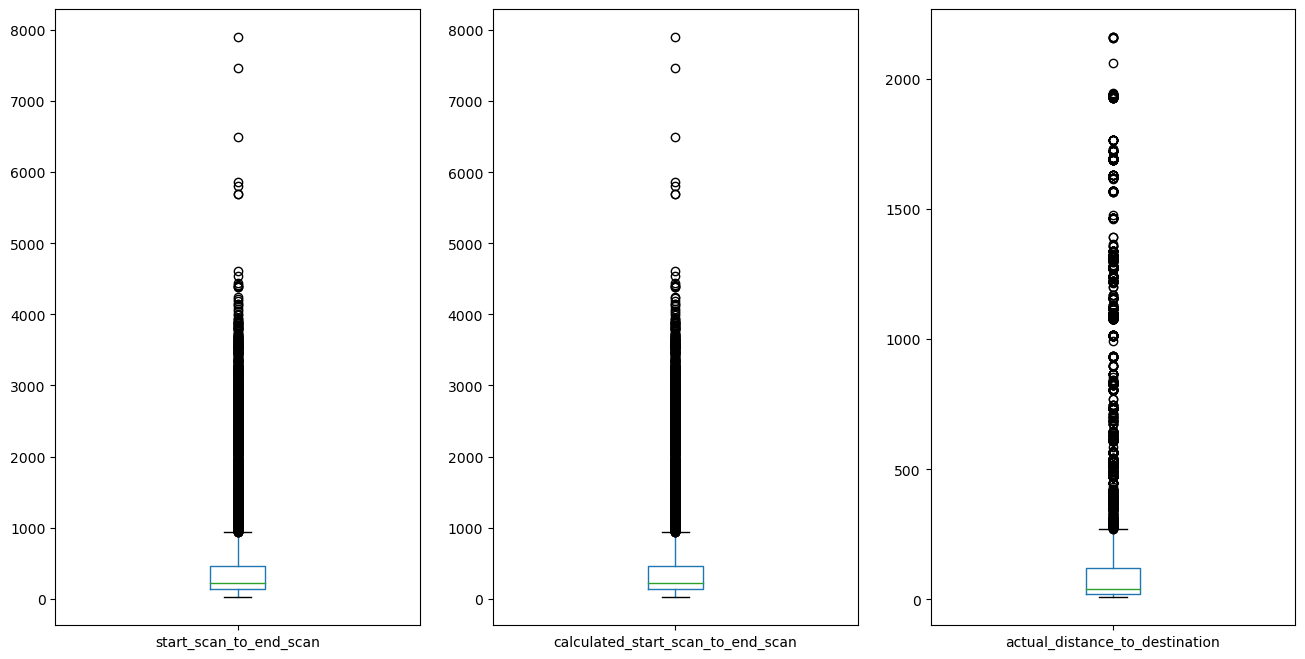

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(1, 3, 1)
box_plote(table_corrected,"start_scan_to_end_scan")
plt.subplot(1,3,2)
box_plote(table_corrected,"calculated_start_scan_to_end_scan")
plt.subplot(1,3,3)
box_plote(table_corrected,"actual_distance_to_destination")
plt.show()

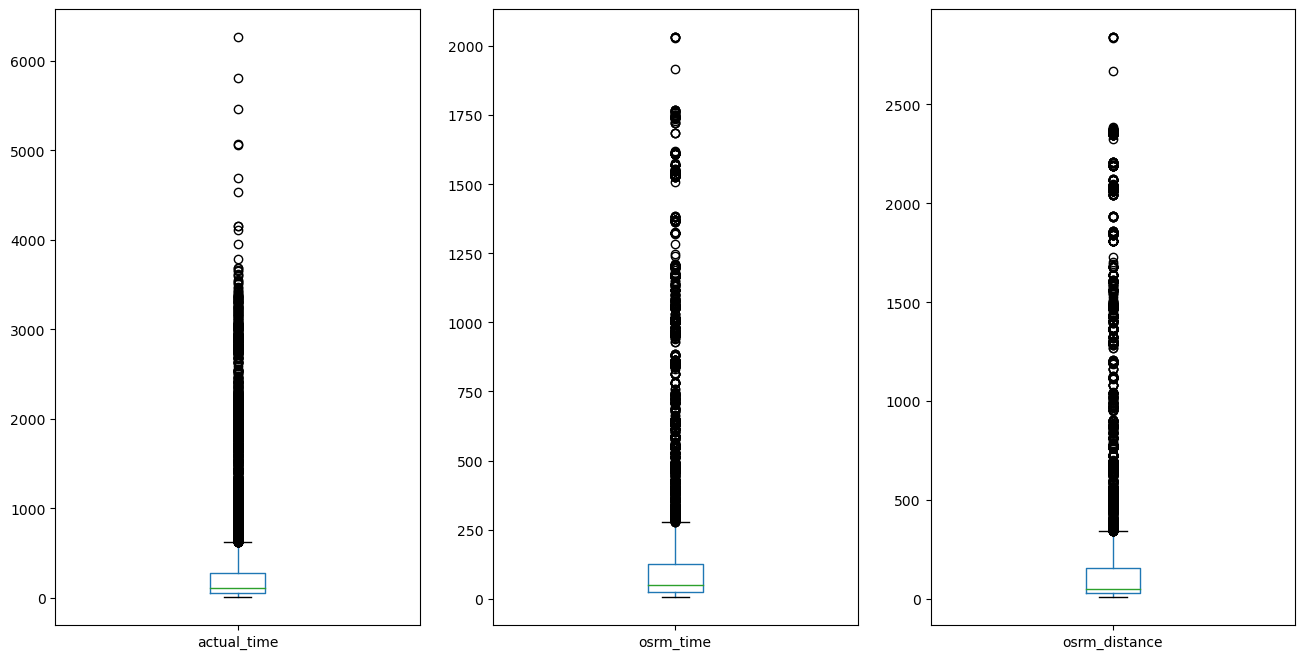

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(1, 3, 1)
box_plote(table_corrected,"actual_time")
plt.subplot(1,3,2)
box_plote(table_corrected,"osrm_time")
plt.subplot(1,3,3)
box_plote(table_corrected,"osrm_distance")
plt.show()

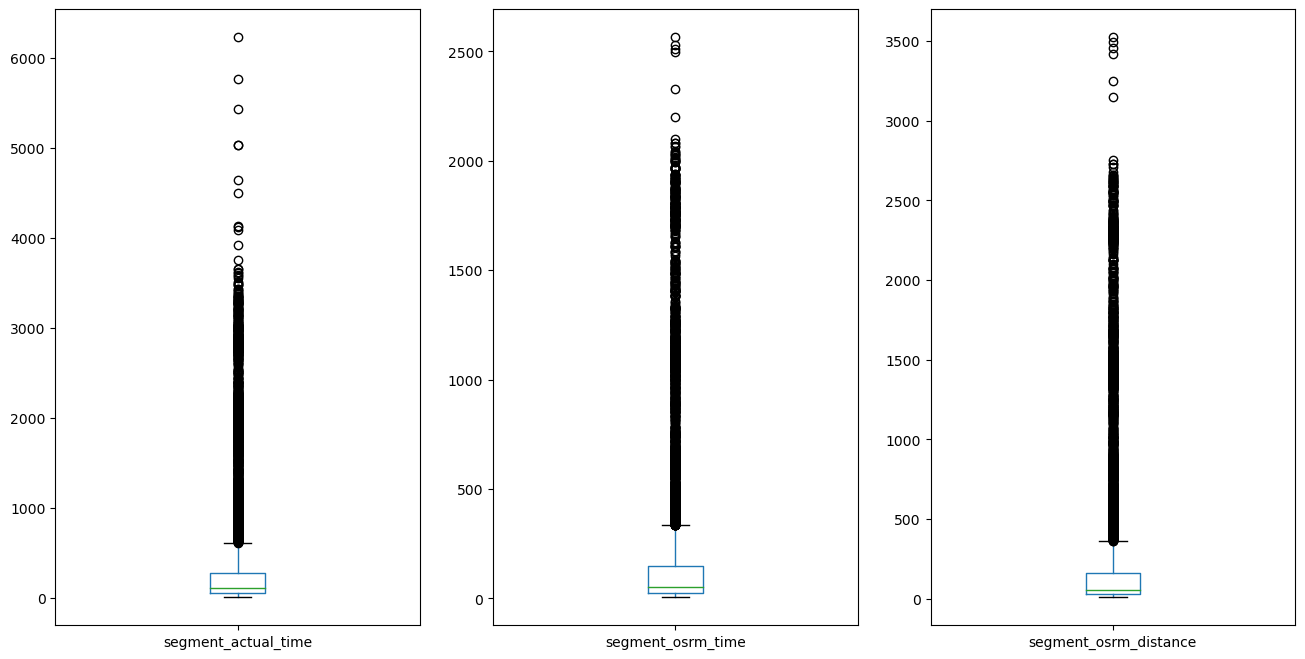

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(1, 3, 1)
box_plote(table_corrected,"segment_actual_time")
plt.subplot(1,3,2)
box_plote(table_corrected,"segment_osrm_time")
plt.subplot(1,3,3)
box_plote(table_corrected,"segment_osrm_distance")
plt.show()

KDE plots of the samples were plotted to get the distribution of the sample data from the table. From the distribution, we can see that most data are highly right-skewed, and removing outliers is necessary.

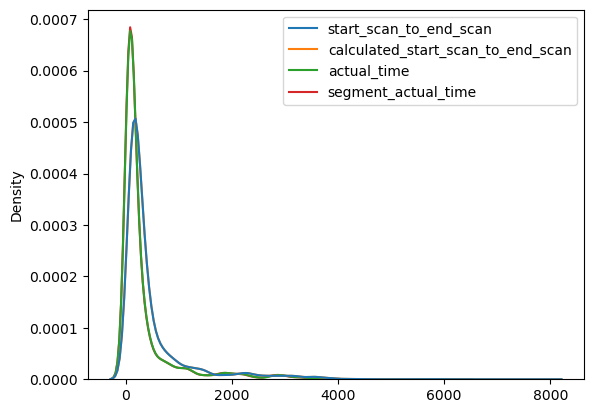

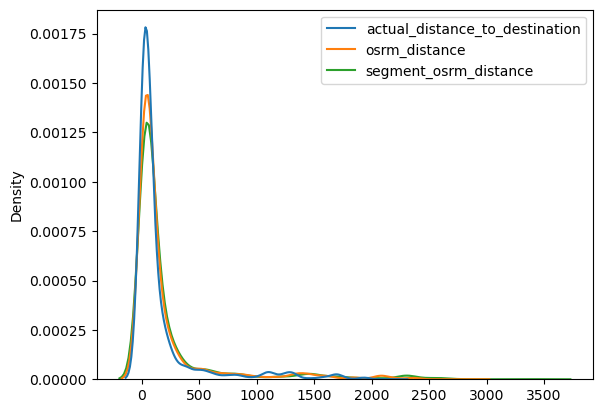

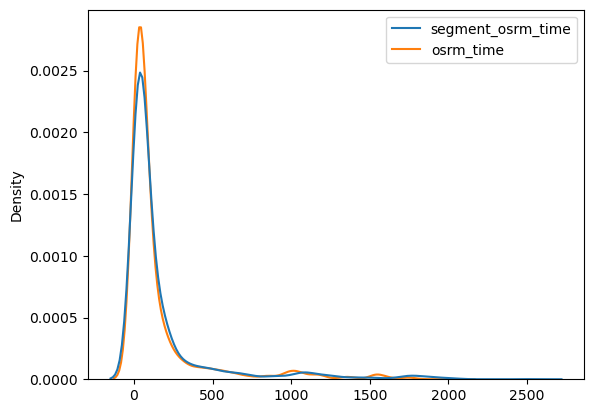

In [203]:
sns.kdeplot(data=table_corrected[["start_scan_to_end_scan","calculated_start_scan_to_end_scan","actual_time","segment_actual_time"]])
plt.show()
sns.kdeplot(data=table_corrected[["actual_distance_to_destination","osrm_distance","segment_osrm_distance"]])
plt.show()
sns.kdeplot(data=table_corrected[["segment_osrm_time","osrm_time"]])
plt.show()

Outliers are removed using the IQR method. For that, a function named outliers is constructed. In the function, with the help of the upper and lower bound values, the indexes of outliers are calculated. To remove the outliers, another function, remove_outliers, is built. This function eliminates outliers based on the index values obtained from the previous function outliers.

In [68]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [70]:
outlier_index = []
for i in ['start_scan_to_end_scan',
       'calculated_start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'cutoff_factor',
       'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
       'segment_factor']:
    outlier_index.extend(outliers(table_corrected,i))

In [71]:
def remove_outliers(df,list_1):
    list_1 = sorted(set(list_1))
    df = df.drop(list_1)
    return df

In [73]:
clean_table = remove_outliers(table_corrected,outlier_index)

In [82]:
clean_table = clean_table.reset_index()

In [84]:
clean_table.drop("index",axis=1,inplace=True)

clean_table is the first table obtained after removing the outliers. This table is merged with table_1 to get the data, route_type, and is_cutoff columns. 

In [87]:
df_3 =  table_1.merge(clean_table,on="trip_uuid",how="inner")

In [204]:
# This is our first table with all the data columns and after outlier removal
df_3

,trip_uuid,data,route_type,is_cutoff,source_center,source_state,destination_center,Destination_state,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cutoff_factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671042288605164,training,Carting,False,IND572101AAA,Karnataka,IND562101AAA,Karnataka,September,2018,12,180.0,181.611874,73.186911,143.0,68.0,85.1110,24.75,141.0,65.0,84.1894,2.025000
1,trip-153671055416136166,training,Carting,False,IND600116AAB,Tamil Nadu,IND602105AAB,Tamil Nadu,September,2018,12,189.0,190.487849,24.597048,61.0,23.0,28.0647,10.50,60.0,23.0,28.0647,2.461688
2,trip-153671066201138152,training,Carting,True,IND600044AAD,Tamil Nadu,IND600048AAA,Tamil Nadu,September,2018,12,98.0,98.005634,9.100510,24.0,13.0,12.0184,9.00,24.0,13.0,12.0184,1.846154
3,trip-153671079956500691,training,Carting,False,IND110024AAA,Delhi,IND110014AAA,Delhi,September,2018,12,49.0,49.333390,9.872146,23.0,8.0,10.0040,9.00,23.0,14.0,16.0860,1.666667
4,trip-153671110078355292,training,Carting,False,IND121004AAB,Haryana,IND121001AAA,Haryana,September,2018,12,38.0,38.500508,9.396526,17.0,9.0,10.8159,9.00,17.0,9.0,10.8159,1.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8578,trip-153861075467184898,test,Carting,False,IND421301AAA,Maharashtra,IND421302AAR,Maharashtra,October,2018,3,110.0,110.412301,9.919745,34.0,10.0,12.3633,9.00,34.0,9.0,12.3633,1.277778
8579,trip-153861089403973335,test,Carting,False,IND390022AAA,Gujarat,IND388320AAA,Gujarat,October,2018,3,98.0,98.726590,33.898361,49.0,36.0,45.1574,22.50,48.0,40.0,50.0725,1.325000
8580,trip-153861089872028474,test,Carting,False,IND600116AAB,Tamil Nadu,IND602001AAA,Tamil Nadu,October,2018,3,181.0,182.416663,27.010926,62.0,28.0,38.2867,11.00,61.0,33.0,33.6400,2.126225
8581,trip-153861091843037040,test,Carting,False,IND400072AAB,Maharashtra,IND401104AAA,Maharashtra,October,2018,3,88.0,88.215987,17.760248,38.0,16.0,20.5065,13.00,37.0,16.0,20.5065,2.312500


In df_3, most data is still right-skewed, but the skewness is reduced compared to the raw data. Still, we cannot say that the outliers in the table df_3 are gone. We can remove these outliers at the expense of reducing data points in the data. To preserve most data points, we are stopping the outlier removal processes.

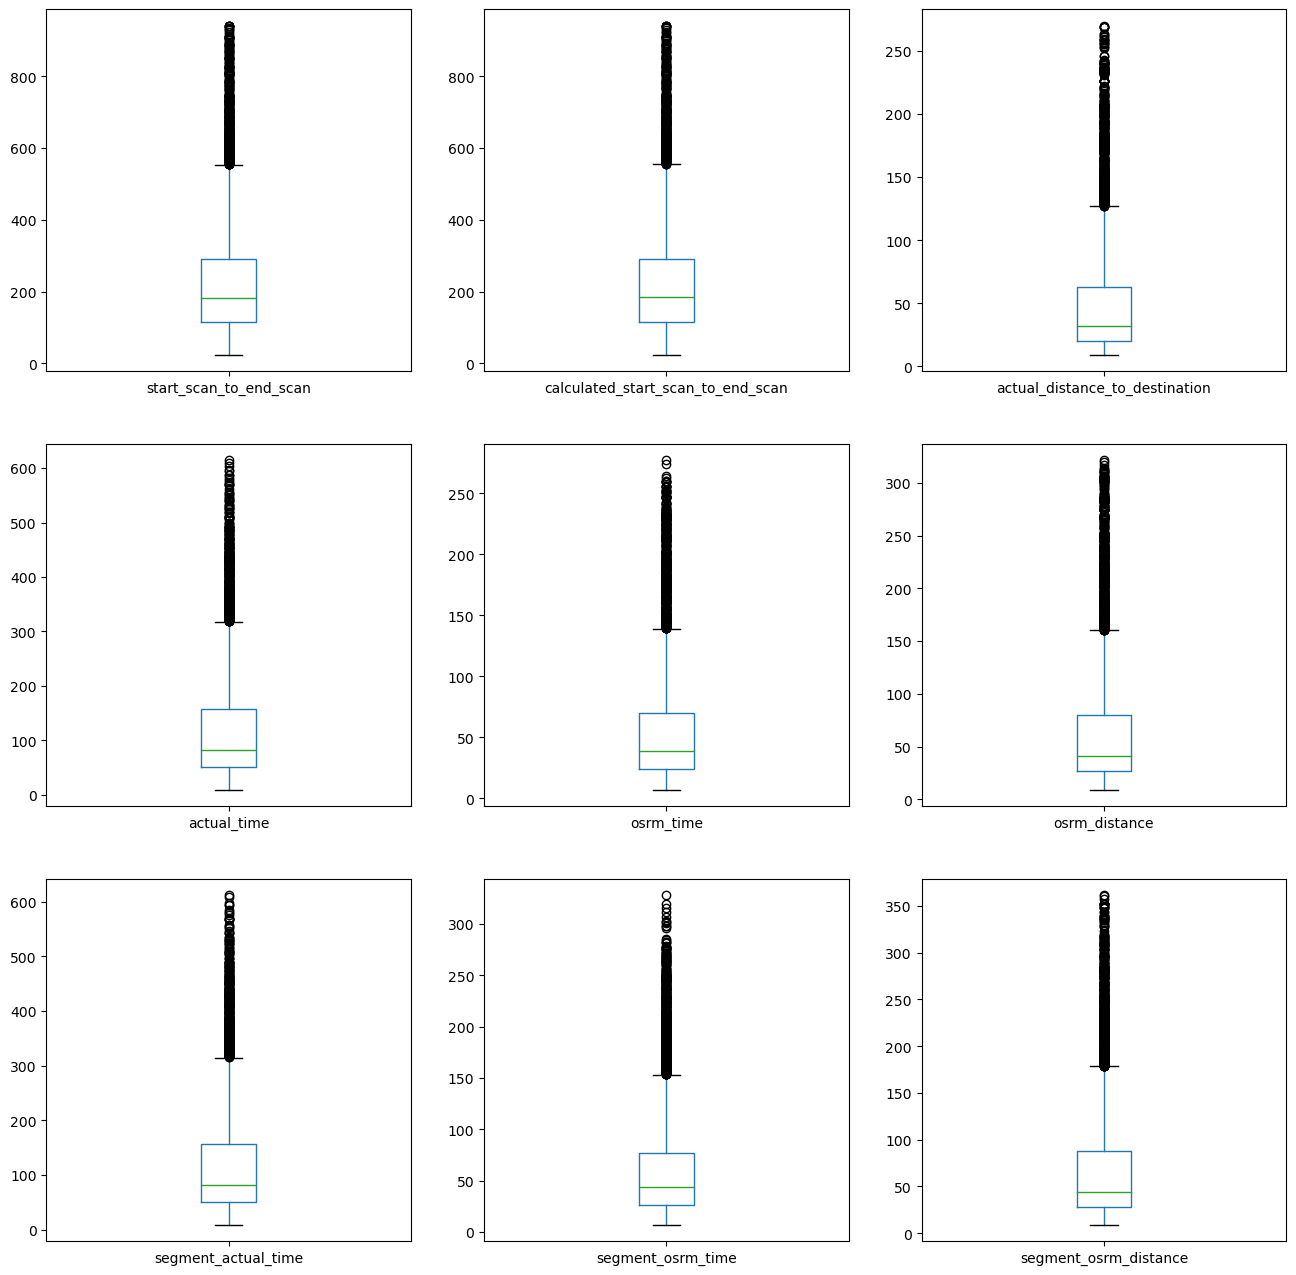

In [91]:
plt.figure(figsize=(16,16))
plt.subplot(3, 3, 1)
box_plote(df_3,"start_scan_to_end_scan")
plt.subplot(3,3,2)
box_plote(df_3,"calculated_start_scan_to_end_scan")
plt.subplot(3,3,3)
box_plote(df_3,"actual_distance_to_destination")
plt.subplot(3, 3, 4)
box_plote(df_3,"actual_time")
plt.subplot(3,3,5)
box_plote(df_3,"osrm_time")
plt.subplot(3,3,6)
box_plote(df_3,"osrm_distance")
plt.subplot(3, 3, 7)
box_plote(df_3,"segment_actual_time")
plt.subplot(3,3,8)
box_plote(df_3,"segment_osrm_time")
plt.subplot(3,3,9)
box_plote(df_3,"segment_osrm_distance")
plt.show()

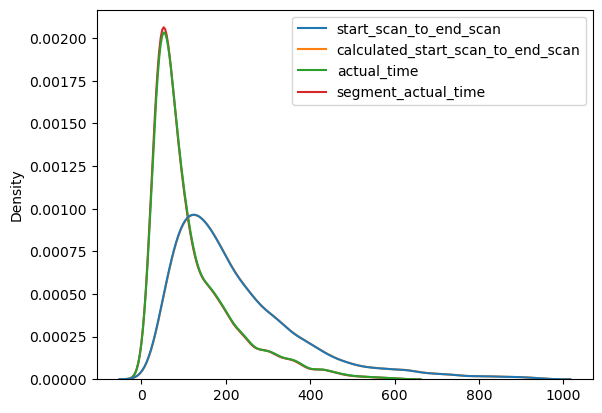

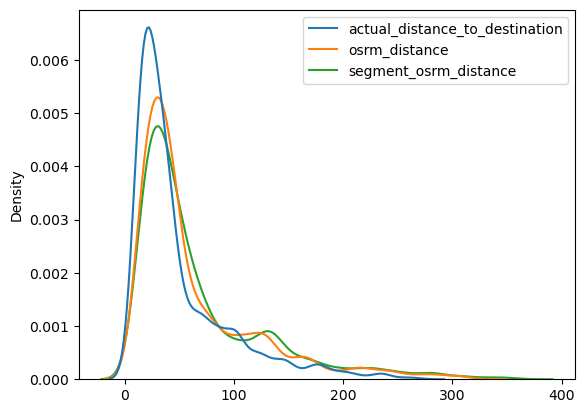

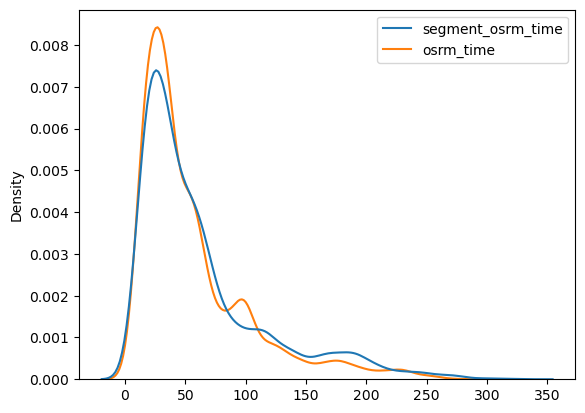

In [205]:
sns.kdeplot(data=df_3[["start_scan_to_end_scan","calculated_start_scan_to_end_scan","actual_time","segment_actual_time"]])
plt.show()
sns.kdeplot(data=df_3[["actual_distance_to_destination","osrm_distance","segment_osrm_distance"]])
plt.show()
sns.kdeplot(data=df_3[["segment_osrm_time","osrm_time"]])
plt.show()

# Data analysis

Countplote is plotted for source and destination state to understand product traffic. From the plot, we can see that Karnataka, Maharashtra, Haryana, Tamil Nadu, and Delhi are the top state with the most traffic, also Himachal Pradesh, Jammu & Kashmir, Arunachal Pradesh, Pondicherry, and Nagaland with less traffic.

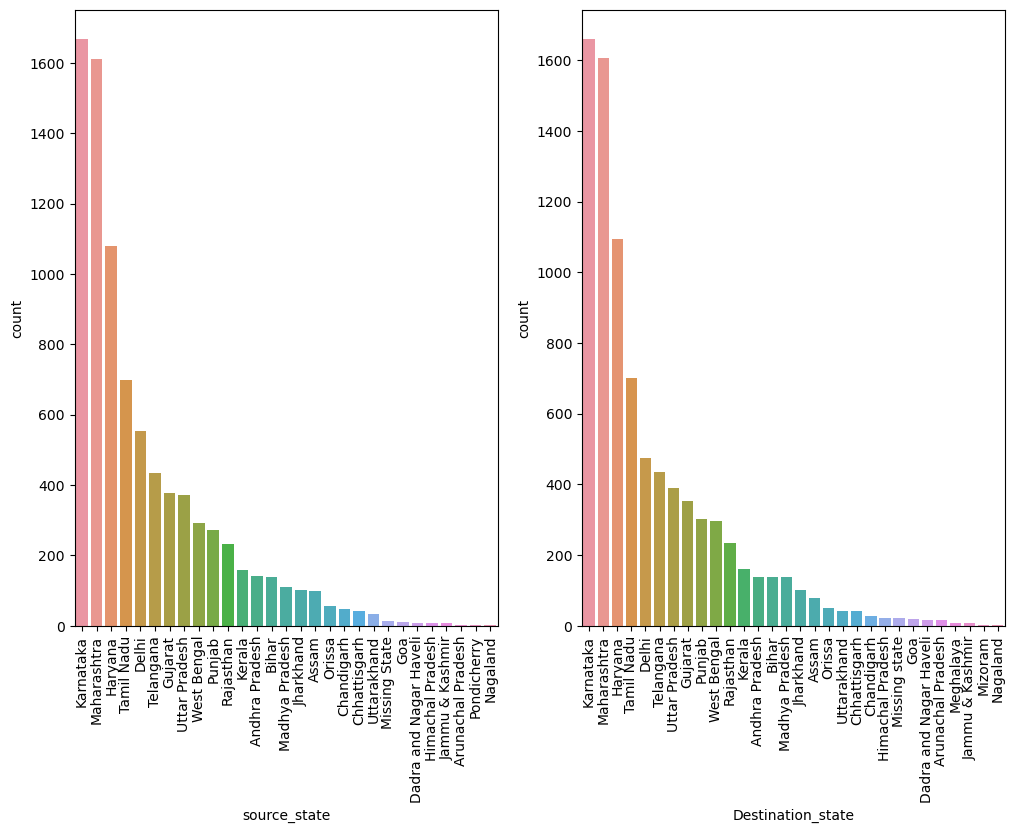

In [101]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.countplot(x="source_state",data=df_3,order = df_3["source_state"].value_counts().index)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x="Destination_state",data=df_3,order = df_3["Destination_state"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

From the table below, we can see that 19.43% of products are transported from Karnataka, followed by Maharashtra, Haryana Tamil Nadu, and Delhi with 18.78%, 12.59%, 8.15%, and 6.45% respectively.

In [102]:
df_3["source_state"].value_counts()/len(df_3)*100

Karnataka                 19.433764
Maharashtra               18.781312
Haryana                   12.594664
Tamil Nadu                 8.155657
Delhi                      6.454620
Telangana                  5.056507
Gujarat                    4.415705
Uttar Pradesh              4.334149
West Bengal                3.390423
Punjab                     3.180706
Rajasthan                  2.726319
Kerala                     1.852499
Andhra Pradesh             1.654433
Bihar                      1.619480
Madhya Pradesh             1.281603
Jharkhand                  1.188396
Assam                      1.165094
Orissa                     0.640802
Chandigarh                 0.547594
Chhattisgarh               0.477688
Uttarakhand                0.384481
Missing State              0.163113
Goa                        0.139811
Dadra and Nagar Haveli     0.104858
Himachal Pradesh           0.093208
Jammu & Kashmir            0.093208
Arunachal Pradesh          0.023302
Pondicherry                0

From the table below, we can see that 19.34% of products are transported to Karnataka, followed by Maharashtra, Haryana Tamil Nadu, and Delhi with 18.73%, 12.74%, 8.16%, and 5.54% respectively.

In [103]:
df_3["Destination_state"].value_counts()/len(df_3)*100

Karnataka                 19.340557
Maharashtra               18.734708
Haryana                   12.746126
Tamil Nadu                 8.167307
Delhi                      5.545846
Telangana                  5.079809
Uttar Pradesh              4.532215
Gujarat                    4.124432
Punjab                     3.518583
West Bengal                3.448678
Rajasthan                  2.726319
Kerala                     1.875801
Andhra Pradesh             1.619480
Bihar                      1.607829
Madhya Pradesh             1.596178
Jharkhand                  1.188396
Assam                      0.908773
Orissa                     0.594198
Uttarakhand                0.489339
Chhattisgarh               0.477688
Chandigarh                 0.337877
Himachal Pradesh           0.267972
Missing state              0.267972
Goa                        0.209717
Dadra and Nagar Haveli     0.198066
Arunachal Pradesh          0.186415
Meghalaya                  0.093208
Jammu & Kashmir            0

To find the top route, df_3 is grouped with respect to source_center and destination_center. The following aggregation is done to get the desired output.

In [105]:
top_route = df_3.groupby(["source_center","destination_center"]).agg({"trip_creation_year":"count","source_state":pd.Series.mode,"Destination_state":pd.Series.mode,'start_scan_to_end_scan':"median",\
       'calculated_start_scan_to_end_scan':"median", 'actual_distance_to_destination':"median",\
       'actual_time':"median", 'osrm_time':"median", 'osrm_distance':"median",\
       'segment_actual_time':"median", 'segment_osrm_time':"median", 'segment_osrm_distance':"median"}).reset_index()

In [108]:
top_route.rename({"trip_creation_year":"Count"},axis=1,inplace=True)

In [109]:
top_route

,source_center,destination_center,Count,source_state,Destination_state,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,IND000000AAL,IND411033AAA,14,Maharashtra,Maharashtra,155.5,156.435877,15.732589,65.5,25.5,24.24965,65.0,28.0,27.90430
1,IND000000ABG,IND501359AAF,11,Telangana,Telangana,263.0,263.478948,27.402104,191.0,27.0,32.68320,189.0,34.0,35.01490
2,IND000000ACA,IND140401AAA,1,Punjab,Punjab,307.0,308.988286,67.489240,95.0,52.0,71.38040,93.0,51.0,71.38040
3,IND000000ACA,IND142401AAA,3,Punjab,Punjab,185.0,185.754007,27.333373,34.0,19.0,27.49710,34.0,19.0,27.49710
4,IND000000ACA,IND143001AAA,15,Punjab,Punjab,257.0,258.098302,140.267563,178.0,113.0,155.71200,176.0,115.0,156.76250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,IND852201AAA,IND854326AAB,2,Bihar,Bihar,568.5,570.347344,115.450392,372.5,118.0,164.37610,371.0,116.5,164.37605
1465,IND853204AAA,IND851204AAA,4,Bihar,Bihar,127.5,128.242613,59.630226,96.0,46.0,65.27315,95.0,44.5,65.27315
1466,IND854326AAB,IND851204AAA,8,Bihar,Bihar,501.5,503.572682,136.879831,285.5,115.0,164.51835,282.5,114.5,167.58285
1467,IND854326AAB,IND852118A1B,1,Bihar,Missing state,329.0,330.630090,68.815028,127.0,54.0,73.28410,126.0,69.0,90.99810


In [110]:
# top_route_top_50
top_route.describe()

,Count,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,1469.00000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000
mean,5.84275,265.941116,266.817422,70.327981,157.093941,77.252212,90.173397,155.634445,83.051396,94.578972
std,11.78424,184.798115,185.055330,55.053354,115.874711,58.466663,69.856304,115.034020,64.081194,73.368234
min,1.00000,23.000000,23.461468,9.027513,11.500000,7.000000,9.654800,11.500000,7.000000,9.654800
25%,1.00000,128.000000,128.768764,25.160278,63.000000,31.000000,33.640100,62.500000,32.000000,34.783100
50%,2.00000,215.500000,216.044973,56.192654,127.000000,62.000000,71.920700,125.000000,65.000000,74.087100
75%,5.00000,347.000000,348.207760,99.394516,219.000000,107.500000,129.648700,217.000000,119.000000,135.213350
max,151.00000,939.000000,941.000780,268.989430,603.000000,275.500000,320.539450,598.000000,328.000000,361.448200


From the above details, we can see a maximum of 151 transfers of products between the top route. Also, there are some routes with a single product transfer. From the KDE plot, we can see that most courses have a transfer between 1 to 25.

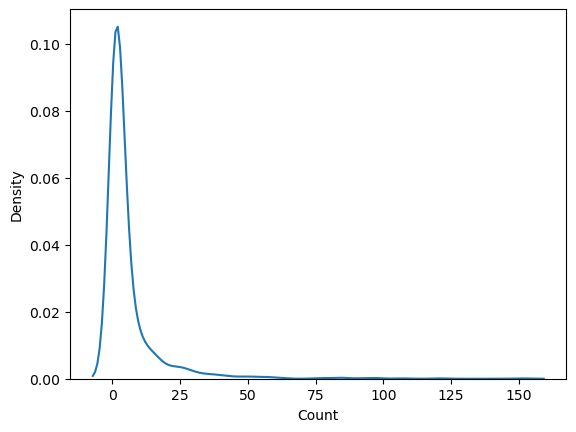

In [208]:
sns.kdeplot(data=top_route["Count"])
plt.show()

Table given below showes the top route with most transfer of products.

In [212]:
top_route[["source_center","destination_center","Count"]].sort_values("Count",ascending=False).head(10)

,source_center,destination_center,Count
960,IND562132AAA,IND560300AAA,151
928,IND560099AAB,IND560300AAA,121
941,IND560300AAA,IND562132AAA,107
959,IND562132AAA,IND560099AAB,97
647,IND421302AAG,IND400072AAB,97
30,IND000000ACB,IND131028AAB,92
940,IND560300AAA,IND560099AAB,85
145,IND131028AAB,IND000000ACB,85
569,IND400072AAD,IND421302AAG,83
929,IND560099AAB,IND562132AAA,78


To get the distribution of transfer time, the top_route table is divided into three tables based on the transfer count. There is a top_50 table with counts greater than 50, a top_25_50 table with a count between 25 to 50, and a bottom_25 table with less than 25.

In [117]:
top_50 = top_route[top_route["Count"]>50]

In [116]:
top_25_50 = top_route[(top_route["Count"]<=50)&(top_route["Count"]>25)]

In [118]:
bottom_25 = top_route[top_route["Count"]<=25]

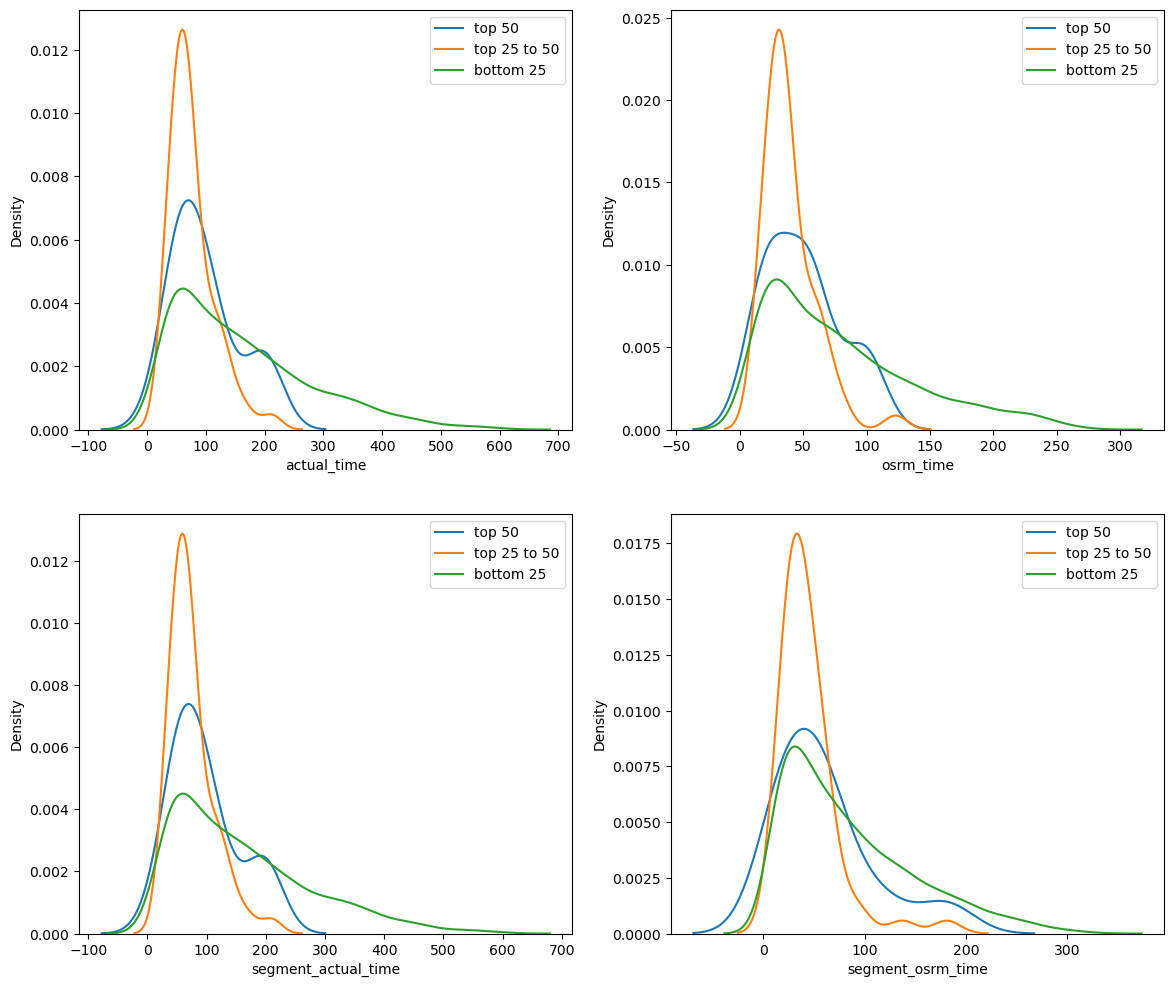

In [149]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.kdeplot(data=top_50["actual_time"],label="top 50")
sns.kdeplot(data=top_25_50["actual_time"],label="top 25 to 50")
sns.kdeplot(data=bottom_25["actual_time"],label="bottom 25")
plt.legend()
plt.subplot(2,2,2)
sns.kdeplot(data=top_50["osrm_time"],label="top 50")
sns.kdeplot(data=top_25_50["osrm_time"],label="top 25 to 50")
sns.kdeplot(data=bottom_25["osrm_time"],label="bottom 25")
plt.legend()
plt.subplot(2,2,3)
sns.kdeplot(data=top_50["segment_actual_time"],label="top 50")
sns.kdeplot(data=top_25_50["segment_actual_time"],label="top 25 to 50")
sns.kdeplot(data=bottom_25["segment_actual_time"],label="bottom 25")
plt.legend()
plt.subplot(2,2,4)
sns.kdeplot(data=top_50["segment_osrm_time"],label="top 50")
sns.kdeplot(data=top_25_50["segment_osrm_time"],label="top 25 to 50")
sns.kdeplot(data=bottom_25["segment_osrm_time"],label="bottom 25")
plt.legend()
plt.show()

From the KDE  plot of the top_50, top_25_50, and bottom_25 table with actual time, we can see that the bottom 25 route takes more time than the other top routes. Among the top route, there is a surprising observation that the route with the most traffic takes more time than the route with a traffic count between 25 to 50. the same trend is observed for osrm time, segment osrm time, and segment actual time.

In [213]:
# bins are created based on the counts for each route and futher grouped based on the bins to obtain the median time each transfer
top_route["Bins"]=pd.cut(x=top_route["Count"],bins=[0,25,50,100,160],labels=["bottom_25","25-50","50-100","100-160"])

In [155]:
top_route.groupby("Bins").agg({"actual_time":"median","osrm_time":"median","segment_actual_time":"median","segment_osrm_time":"median"})

,actual_time,osrm_time,segment_actual_time,segment_osrm_time
Bins,,,,
bottom_25,132.0,65.0,132.0,67.0
25-50,67.0,34.0,66.0,37.0
50-100,74.5,42.0,73.5,44.0
100-160,91.0,51.0,90.0,64.0


After analyzing the above data, we can conclude that the route with counts less than 25 (bottom_25) takes more time than any other route. Route with a count between 25-50 takes less time (49.2% faster than bottom_25) than any different route. Count with 50-100 is 43.5% faster than the bottom 25. Surprisingly top route (100-160) is slower compared to other routes except the bottom 25. Another trend is that actual time is twice the osrm time (same for segment time).

# Hypothesis testing

In [214]:
from scipy.stats import ttest_ind,kstest

To compare the mean values, a hypothesis test (ttest and kstest) is done on the desired columns, the alpha value is set to 0.01. Two functions named t_test_ind and ks_test is defined to do the hypothesis test. 

In [158]:
def t_test_ind(df,ft_1,ft_2,alt="two-sided",alpha=0.01):
    test_statistic, p_value=ttest_ind(df[ft_1],\
                                  df[ft_2],alternative=alt)
    print("test stat" , test_statistic)
    print("p_vale ",p_value)
    if p_value<alpha:
        print("Reject H0")
    else:
        print("Fail to Reject H0 ")

In [159]:
def ks_test(df,ft_1,ft_2,aipha=0.01):
    alpha=0.01
    test_statistic, p_value=kstest(df[ft_1],\
                                  df[ft_2])
    print("test stat" , test_statistic)
    print("p_vale ",p_value)
    if p_value<alpha:
        print("Reject H0")
    else:
        print("Fail to Reject H0 ")

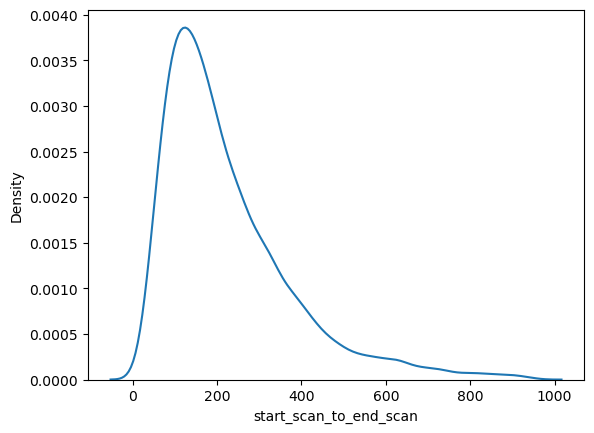

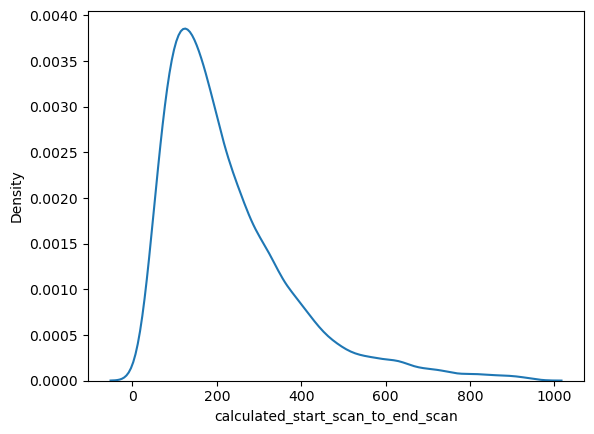

In [160]:
sns.kdeplot(df_3["start_scan_to_end_scan"])
plt.show()
sns.kdeplot(df_3["calculated_start_scan_to_end_scan"])
plt.show()

In [161]:
# H0 = mean of "start_scan_to_end_scan" = mean of "calculated_start_scan_to_end_scan"
# Ha = mean are different
# alpha = 0.01
t_test_ind(df_3,"start_scan_to_end_scan","calculated_start_scan_to_end_scan")

test stat -0.285203594683447
p_vale  0.7754916077491162
Fail to Reject H0 


In [162]:
# H0 = mean of "start_scan_to_end_scan" = mean of "calculated_start_scan_to_end_scan"
# Ha = mean are different
t_test_ind(df_3,"start_scan_to_end_scan","calculated_start_scan_to_end_scan",alt="greater")

test stat -0.285203594683447
p_vale  0.612254196125442
Fail to Reject H0 


In [163]:
# H0 = mean of "start_scan_to_end_scan" = mean of "calculated_start_scan_to_end_scan"
# Ha = mean are different
t_test_ind(df_3,"start_scan_to_end_scan","calculated_start_scan_to_end_scan",alt="less")

test stat -0.285203594683447
p_vale  0.3877458038745581
Fail to Reject H0 


In [164]:
# H0 = "start_scan_to_end_scan" and "calculated_start_scan_to_end_scan" follow same distribution.
# Ha = distribution is different
ks_test(df_3,"start_scan_to_end_scan","calculated_start_scan_to_end_scan")

test stat 0.005242922055225445
p_vale  0.9997908829000998
Fail to Reject H0 


"start_scan_to_end_scan" and "calculated_start_scan_to_end_scan" have the same mean and similar distribution.

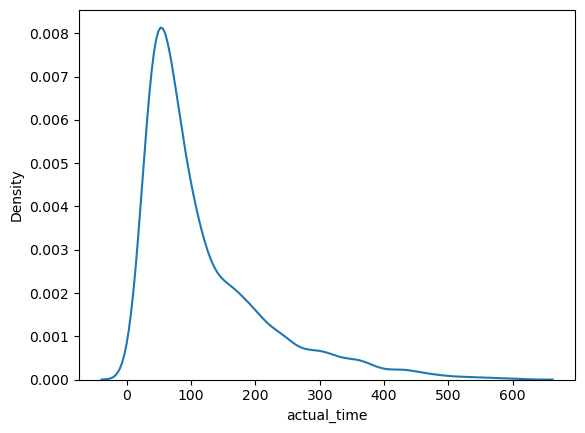

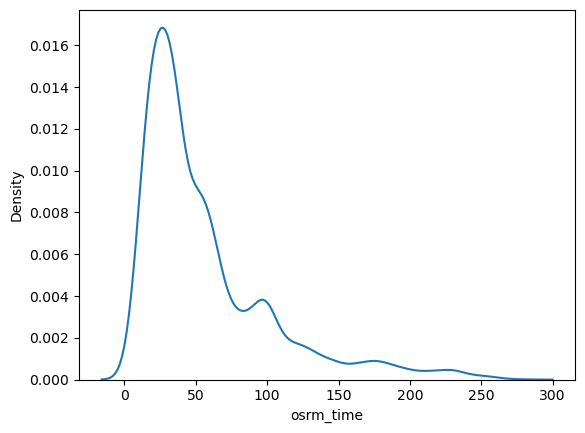

In [165]:
sns.kdeplot(df_3["actual_time"])
plt.show()
sns.kdeplot(df_3["osrm_time"])
plt.show()

In [168]:
# H0 = mean of "actual_time" = mean of "osrm_time"
# Ha = mean are different
t_test_ind(df_3,"actual_time","osrm_time")

test stat 53.351008462345966
p_vale  0.0
Reject H0


In [169]:
# H0 = mean of "actual_time" > mean of "osrm_time"
# Ha = mean are different
t_test_ind(df_3,"actual_time","osrm_time",alt="greater")

test stat 53.351008462345966
p_vale  0.0
Reject H0


The mean of "actual_time" is more significant than "osrm_time," which shows that to deliver a product, the company takes more time than expected.

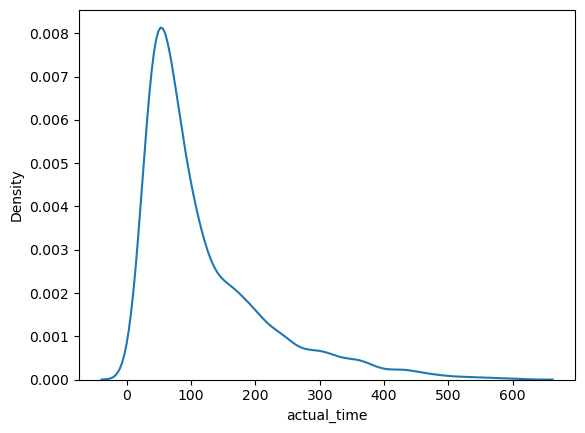

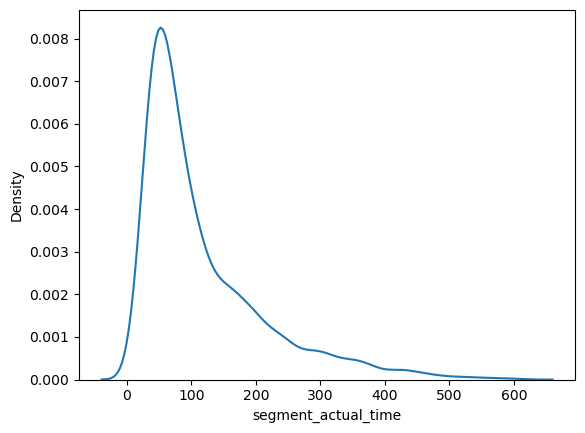

In [171]:
sns.kdeplot(df_3["actual_time"])
plt.show()
sns.kdeplot(df_3["segment_actual_time"])
plt.show()

In [174]:
# H0 = mean of "actual_time" = mean of "segment_actual_time"
# Ha = mean are different
t_test_ind(df_3,"actual_time","segment_actual_time")

test stat 0.8579738053523455
p_vale  0.3909189080406509
Fail to Reject H0 


In [175]:
# H0 = "actual_time" and "segment_actual_time" followes same distribution 
# Ha = distribution is different
ks_test(df_3,"actual_time","segment_actual_time")

test stat 0.010136315973435861
p_vale  0.7700093733915373
Fail to Reject H0 


"actual_time" and "segment_actual_time" have similer mean

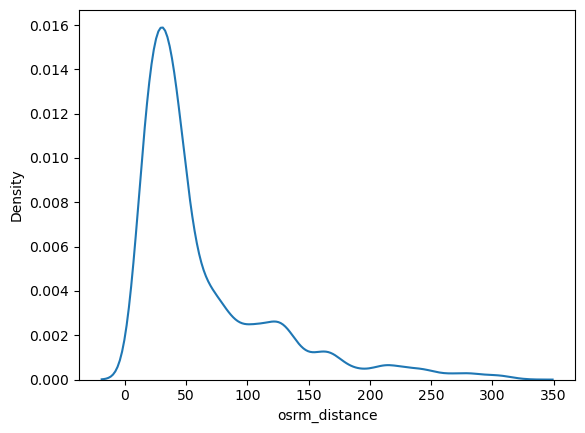

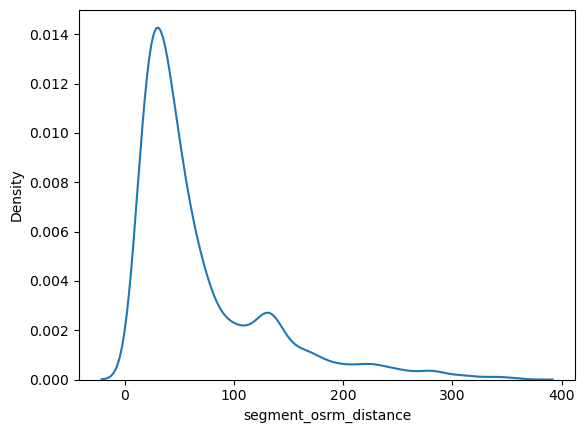

In [177]:
sns.kdeplot(df_3["osrm_distance"])
plt.show()
sns.kdeplot(df_3["segment_osrm_distance"])
plt.show()

In [179]:
# H0 = mean of "osrm_distance" = mean of "segment_osrm_distance"
# Ha = mean are different
t_test_ind(df_3,"osrm_distance","segment_osrm_distance",alt="less")

test stat -5.2600449955334865
p_vale  7.287446491201129e-08
Reject H0


"osrm_distance" and "segment_osrm_distance" have different mean value

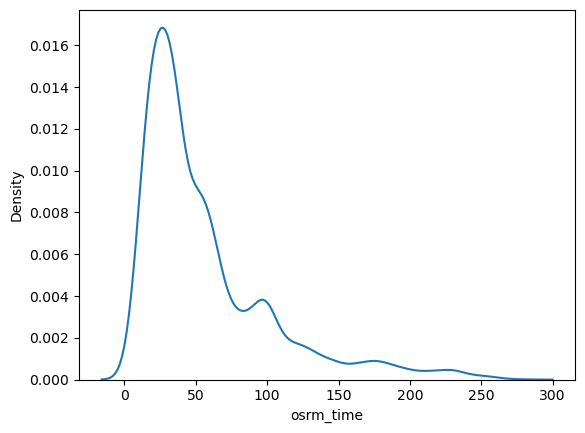

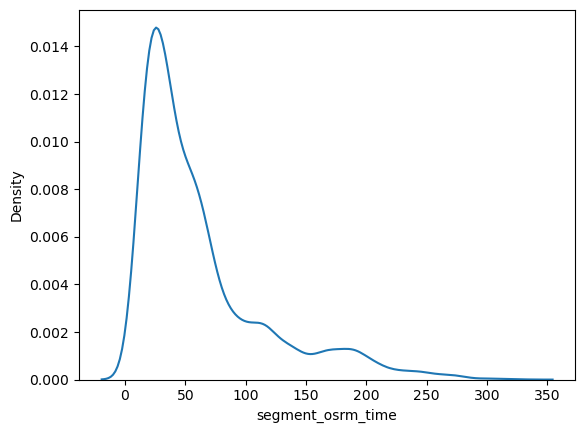

In [180]:
sns.kdeplot(df_3["osrm_time"])
plt.show()
sns.kdeplot(df_3["segment_osrm_time"])
plt.show()

In [181]:
# H0 = mean of "osrm_time" = mean of "segment_osrm_time"
# Ha = mean are different
t_test_ind(df_3,"osrm_time","segment_osrm_time")

test stat -8.141443417982245
p_vale  4.171343596170895e-16
Reject H0


"osrm_time" have "segment_osrm_time" different mean

# Normalisation

In [182]:
normalized = df_3.copy()

In [183]:
normalized

,trip_uuid,data,route_type,is_cutoff,source_center,source_state,destination_center,Destination_state,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cutoff_factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671042288605164,training,Carting,False,IND572101AAA,Karnataka,IND562101AAA,Karnataka,September,2018,12,180.0,181.611874,73.186911,143.0,68.0,85.1110,24.75,141.0,65.0,84.1894,2.025000
1,trip-153671055416136166,training,Carting,False,IND600116AAB,Tamil Nadu,IND602105AAB,Tamil Nadu,September,2018,12,189.0,190.487849,24.597048,61.0,23.0,28.0647,10.50,60.0,23.0,28.0647,2.461688
2,trip-153671066201138152,training,Carting,True,IND600044AAD,Tamil Nadu,IND600048AAA,Tamil Nadu,September,2018,12,98.0,98.005634,9.100510,24.0,13.0,12.0184,9.00,24.0,13.0,12.0184,1.846154
3,trip-153671079956500691,training,Carting,False,IND110024AAA,Delhi,IND110014AAA,Delhi,September,2018,12,49.0,49.333390,9.872146,23.0,8.0,10.0040,9.00,23.0,14.0,16.0860,1.666667
4,trip-153671110078355292,training,Carting,False,IND121004AAB,Haryana,IND121001AAA,Haryana,September,2018,12,38.0,38.500508,9.396526,17.0,9.0,10.8159,9.00,17.0,9.0,10.8159,1.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8578,trip-153861075467184898,test,Carting,False,IND421301AAA,Maharashtra,IND421302AAR,Maharashtra,October,2018,3,110.0,110.412301,9.919745,34.0,10.0,12.3633,9.00,34.0,9.0,12.3633,1.277778
8579,trip-153861089403973335,test,Carting,False,IND390022AAA,Gujarat,IND388320AAA,Gujarat,October,2018,3,98.0,98.726590,33.898361,49.0,36.0,45.1574,22.50,48.0,40.0,50.0725,1.325000
8580,trip-153861089872028474,test,Carting,False,IND600116AAB,Tamil Nadu,IND602001AAA,Tamil Nadu,October,2018,3,181.0,182.416663,27.010926,62.0,28.0,38.2867,11.00,61.0,33.0,33.6400,2.126225
8581,trip-153861091843037040,test,Carting,False,IND400072AAB,Maharashtra,IND401104AAA,Maharashtra,October,2018,3,88.0,88.215987,17.760248,38.0,16.0,20.5065,13.00,37.0,16.0,20.5065,2.312500


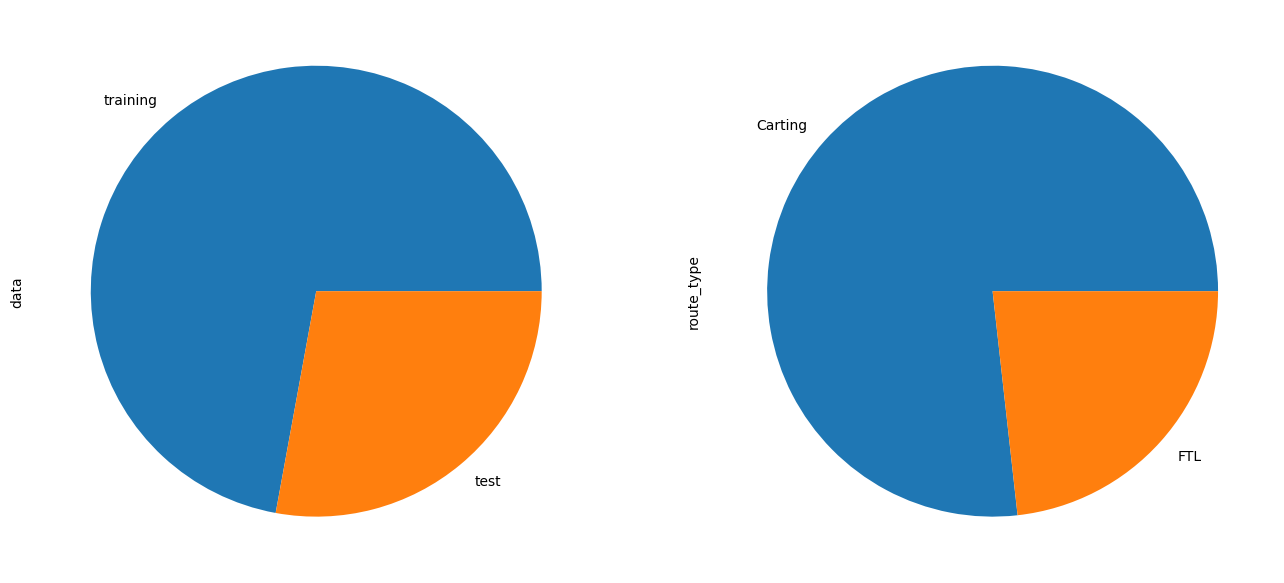

In [194]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
normalized['data'].value_counts().plot(kind='pie')
plt.subplot(1,2,2)
normalized['route_type'].value_counts().plot(kind='pie')
plt.show()

In [195]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [196]:
ls_1 = ["start_scan_to_end_scan",'calculated_start_scan_to_end_scan', 'actual_distance_to_destination',\
       'actual_time', 'osrm_time', 'osrm_distance', 'cutoff_factor',\
       'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',\
       'segment_factor']
for i in ls_1:
    
    normalized[i] = MinMaxScaler().fit_transform(np.array(normalized[i]).reshape(-1,1))

In [197]:
normalized

,trip_uuid,data,route_type,is_cutoff,source_center,source_state,destination_center,Destination_state,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cutoff_factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671042288605164,training,Carting,False,IND572101AAA,Karnataka,IND562101AAA,Karnataka,September,2018,12,0.171024,0.172310,0.245910,0.221488,0.225926,0.243639,0.205882,0.218905,0.180685,0.213172,0.549306
1,trip-153671055416136166,training,Carting,False,IND600116AAB,Tamil Nadu,IND602105AAB,Tamil Nadu,September,2018,12,0.180828,0.181981,0.059748,0.085950,0.059259,0.060853,0.019608,0.084577,0.049844,0.053897,0.682738
2,trip-153671066201138152,training,Carting,True,IND600044AAD,Tamil Nadu,IND600048AAA,Tamil Nadu,September,2018,12,0.081699,0.081218,0.000376,0.024793,0.022222,0.009438,0.000000,0.024876,0.018692,0.008359,0.494658
3,trip-153671079956500691,training,Carting,False,IND110024AAA,Delhi,IND110014AAA,Delhi,September,2018,12,0.028322,0.028188,0.003332,0.023140,0.003704,0.002983,0.000000,0.023217,0.021807,0.019902,0.439815
4,trip-153671110078355292,training,Carting,False,IND121004AAB,Haryana,IND121001AAA,Haryana,September,2018,12,0.016340,0.016386,0.001510,0.013223,0.007407,0.005585,0.000000,0.013267,0.006231,0.004946,0.507716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8578,trip-153861075467184898,test,Carting,False,IND421301AAA,Maharashtra,IND421302AAR,Maharashtra,October,2018,3,0.094771,0.094736,0.003514,0.041322,0.011111,0.010543,0.000000,0.041459,0.006231,0.009338,0.320988
8579,trip-153861089403973335,test,Carting,False,IND390022AAA,Gujarat,IND388320AAA,Gujarat,October,2018,3,0.081699,0.082004,0.095384,0.066116,0.107407,0.115621,0.176471,0.064677,0.102804,0.116352,0.335417
8580,trip-153861089872028474,test,Carting,False,IND600116AAB,Tamil Nadu,IND602001AAA,Tamil Nadu,October,2018,3,0.172113,0.173187,0.068996,0.087603,0.077778,0.093606,0.026144,0.086235,0.080997,0.069719,0.580236
8581,trip-153861091843037040,test,Carting,False,IND400072AAB,Maharashtra,IND401104AAA,Maharashtra,October,2018,3,0.070806,0.070552,0.033554,0.047934,0.033333,0.036635,0.052288,0.046434,0.028037,0.032447,0.637153


In [198]:
from sklearn.preprocessing import LabelEncoder

In [199]:
normalized["data"]=LabelEncoder().fit_transform(normalized["data"])
normalized["route_type"]=LabelEncoder().fit_transform(normalized["route_type"])


In [201]:
normalized["is_cutoff"]=LabelEncoder().fit_transform(normalized["is_cutoff"])

table is normalized with MinMaxScaler and categorical values are encoded with LabelEncoder

In [218]:
normalized

,trip_uuid,data,route_type,is_cutoff,source_center,source_state,destination_center,Destination_state,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan,calculated_start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,cutoff_factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153671042288605164,1,0,0,IND572101AAA,Karnataka,IND562101AAA,Karnataka,September,2018,12,0.171024,0.172310,0.245910,0.221488,0.225926,0.243639,0.205882,0.218905,0.180685,0.213172,0.549306
1,trip-153671055416136166,1,0,0,IND600116AAB,Tamil Nadu,IND602105AAB,Tamil Nadu,September,2018,12,0.180828,0.181981,0.059748,0.085950,0.059259,0.060853,0.019608,0.084577,0.049844,0.053897,0.682738
2,trip-153671066201138152,1,0,1,IND600044AAD,Tamil Nadu,IND600048AAA,Tamil Nadu,September,2018,12,0.081699,0.081218,0.000376,0.024793,0.022222,0.009438,0.000000,0.024876,0.018692,0.008359,0.494658
3,trip-153671079956500691,1,0,0,IND110024AAA,Delhi,IND110014AAA,Delhi,September,2018,12,0.028322,0.028188,0.003332,0.023140,0.003704,0.002983,0.000000,0.023217,0.021807,0.019902,0.439815
4,trip-153671110078355292,1,0,0,IND121004AAB,Haryana,IND121001AAA,Haryana,September,2018,12,0.016340,0.016386,0.001510,0.013223,0.007407,0.005585,0.000000,0.013267,0.006231,0.004946,0.507716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8578,trip-153861075467184898,0,0,0,IND421301AAA,Maharashtra,IND421302AAR,Maharashtra,October,2018,3,0.094771,0.094736,0.003514,0.041322,0.011111,0.010543,0.000000,0.041459,0.006231,0.009338,0.320988
8579,trip-153861089403973335,0,0,0,IND390022AAA,Gujarat,IND388320AAA,Gujarat,October,2018,3,0.081699,0.082004,0.095384,0.066116,0.107407,0.115621,0.176471,0.064677,0.102804,0.116352,0.335417
8580,trip-153861089872028474,0,0,0,IND600116AAB,Tamil Nadu,IND602001AAA,Tamil Nadu,October,2018,3,0.172113,0.173187,0.068996,0.087603,0.077778,0.093606,0.026144,0.086235,0.080997,0.069719,0.580236
8581,trip-153861091843037040,0,0,0,IND400072AAB,Maharashtra,IND401104AAA,Maharashtra,October,2018,3,0.070806,0.070552,0.033554,0.047934,0.033333,0.036635,0.052288,0.046434,0.028037,0.032447,0.637153


<AxesSubplot:>

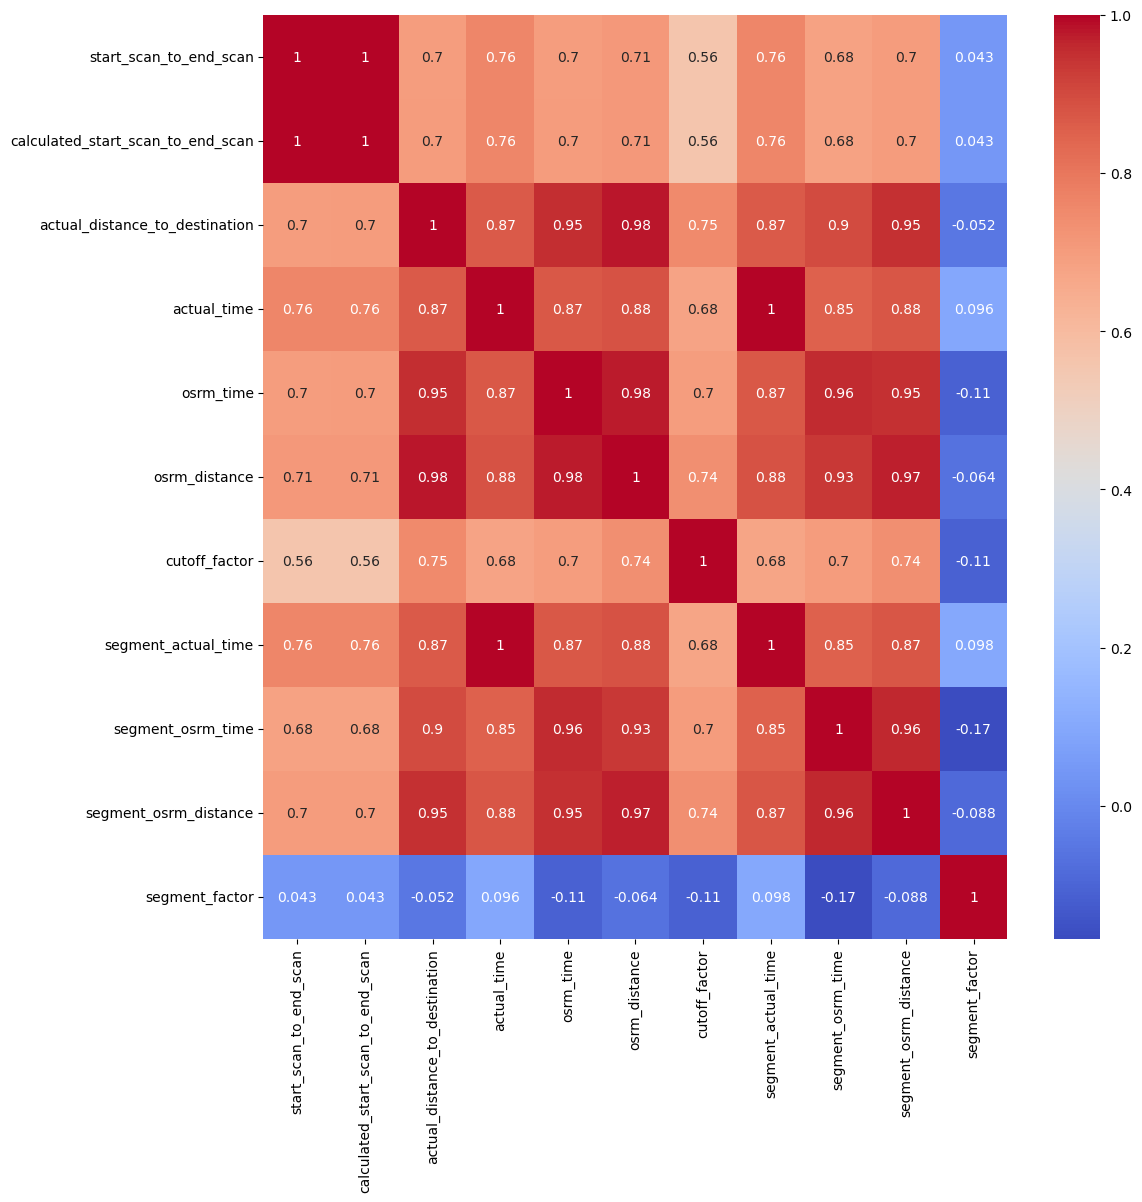

In [221]:
plt.figure(figsize=(12,12))
sns.heatmap(normalized[[
       'start_scan_to_end_scan', 'calculated_start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'cutoff_factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']].corr(method="pearson"),annot=True,cmap="coolwarm")